## EEG Model
	--


In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import logging
import warnings

# Logging
	Make the logging to show the Error 

In [45]:
logger = logging.getLogger(__name__)

## Data
	

In [35]:
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.2)

In [42]:
df = pd.read_csv(r'../../data/data_EEG/s00.csv', index_col=0)

In [43]:
df

,-2.7403,-2.5017,0.095121,-7.0917,-0.42704,-2.5918,-3.3238,0.9995,0.87011,-0.080058,2.8075,-0.52398,1.9341,-3.7614,-1.144,0.033687,2.7164,0.84831
4.476,,,,,,,,,,,,,,,,,,
1.208000,-3.308800,-4.417800,-0.529350,-8.578200,0.40699,-3.099600,-3.600500,-0.048363,-0.172580,-0.129650,3.287200,-1.066700,1.535700,-5.193300,-2.226300,-0.682180,4.82870,0.452610
-2.546000,-3.708300,-6.410900,-1.003300,-10.220000,1.87700,-3.695200,-3.867300,-1.132300,-1.328500,-0.094006,3.975600,-1.674300,1.128500,-6.556500,-3.095300,-1.284400,6.65130,-0.103930
-6.187100,-3.680400,-8.029700,-1.103100,-11.721000,4.01570,-4.265200,-4.053000,-1.984100,-2.360700,0.076473,4.833100,-2.229300,0.793640,-7.478700,-3.420900,-1.540900,7.63710,-0.742500
-9.111000,-3.002700,-8.844400,-0.651400,-12.784000,6.71770,-4.670800,-4.096500,-2.337200,-3.025500,0.401930,5.780500,-2.614500,0.587410,-7.643000,-2.982900,-1.248700,7.45120,-1.326400
-10.882000,-1.579500,-8.596200,0.418450,-13.195000,9.74310,-4.777800,-3.975900,-2.021600,-3.159800,0.869980,6.714100,-2.752800,0.508090,-6.901900,-1.758500,-0.318570,6.14100,-1.696300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.000414,-0.001403,0.000025,0.000023,-0.001488,-0.00003,-0.000284,-0.000182,-0.000798,-0.000118,-0.001017,0.000471,0.001263,-0.001314,0.001058,0.000213,-0.000402,-0.00123,-0.000984
-0.000414,-0.001403,0.000025,0.000023,-0.001488,-0.00003,-0.000284,-0.000182,-0.000798,-0.000118,-0.001017,0.000471,0.001263,-0.001314,0.001058,0.000213,-0.000402,-0.00123,-0.000984
-0.000414,-0.001403,0.000025,0.000023,-0.001488,-0.00003,-0.000284,-0.000182,-0.000798,-0.000118,-0.001017,0.000471,0.001263,-0.001314,0.001058,0.000213,-0.000402,-0.00123,-0.000984


In [46]:
df.head()

,-2.7403,-2.5017,0.095121,-7.0917,-0.42704,-2.5918,-3.3238,0.9995,0.87011,-0.080058,2.8075,-0.52398,1.9341,-3.7614,-1.144,0.033687,2.7164,0.84831
4.476,,,,,,,,,,,,,,,,,,
1.2080,-3.3088,-4.4178,-0.52935,-8.5782,0.40699,-3.0996,-3.6005,-0.048363,-0.17258,-0.129650,3.2872,-1.0667,1.53570,-5.1933,-2.2263,-0.68218,4.8287,0.45261
-2.5460,-3.7083,-6.4109,-1.00330,-10.2200,1.87700,-3.6952,-3.8673,-1.132300,-1.32850,-0.094006,3.9756,-1.6743,1.12850,-6.5565,-3.0953,-1.28440,6.6513,-0.10393
-6.1871,-3.6804,-8.0297,-1.10310,-11.7210,4.01570,-4.2652,-4.0530,-1.984100,-2.36070,0.076473,4.8331,-2.2293,0.79364,-7.4787,-3.4209,-1.54090,7.6371,-0.74250
-9.1110,-3.0027,-8.8444,-0.65140,-12.7840,6.71770,-4.6708,-4.0965,-2.337200,-3.02550,0.401930,5.7805,-2.6145,0.58741,-7.6430,-2.9829,-1.24870,7.4512,-1.32640
-10.8820,-1.5795,-8.5962,0.41845,-13.1950,9.74310,-4.7778,-3.9759,-2.021600,-3.15980,0.869980,6.7141,-2.7528,0.50809,-6.9019,-1.7585,-0.31857,6.1410,-1.69630


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30999 entries, 1.208 to -0.00041361
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   -2.7403    30999 non-null  float64
 1   -2.5017    30999 non-null  float64
 2   0.095121   30999 non-null  float64
 3   -7.0917    30999 non-null  float64
 4   -0.42704   30999 non-null  float64
 5   -2.5918    30999 non-null  float64
 6   -3.3238    30999 non-null  float64
 7   0.9995     30999 non-null  float64
 8   0.87011    30999 non-null  float64
 9   -0.080058  30999 non-null  float64
 10  2.8075     30999 non-null  float64
 11  -0.52398   30999 non-null  float64
 12  1.9341     30999 non-null  float64
 13  -3.7614    30999 non-null  float64
 14  -1.144     30999 non-null  float64
 15  0.033687   30999 non-null  float64
 16  2.7164     30999 non-null  float64
 17  0.84831    30999 non-null  float64
dtypes: float64(18)
memory usage: 4.5 MB


In [51]:
stats = df.describe().T

In [52]:
stats

,count,mean,std,min,25%,50%,75%,max
-2.7403,30999.0,-0.302683,12.409824,-82.339,-7.68340,0.008535,7.38050,47.909
-2.5017,30999.0,-0.209628,12.941858,-68.406,-8.80595,0.000025,8.13290,46.165
0.095121,30999.0,-0.137932,12.318097,-58.415,-7.86220,0.000023,7.94620,45.455
-7.0917,30999.0,-0.184192,12.982267,-74.958,-8.49305,-0.001488,8.26310,48.981
-0.42704,30999.0,-0.192609,12.644251,-70.010,-8.49030,-0.045457,7.89150,49.068
-2.5918,30999.0,-0.064420,11.587948,-56.657,-7.41960,-0.000284,7.44860,47.981
-3.3238,30999.0,-0.055097,13.324837,-67.151,-8.17600,-0.138500,8.22010,62.347
0.9995,30999.0,-0.159580,11.665035,-55.330,-7.77830,-0.000798,7.47400,39.125
0.87011,30999.0,-0.150594,11.487882,-49.501,-7.19695,-0.000118,7.51535,36.773
-0.080058,30999.0,-0.049889,10.231693,-54.153,-6.52185,-0.001017,6.41060,47.414


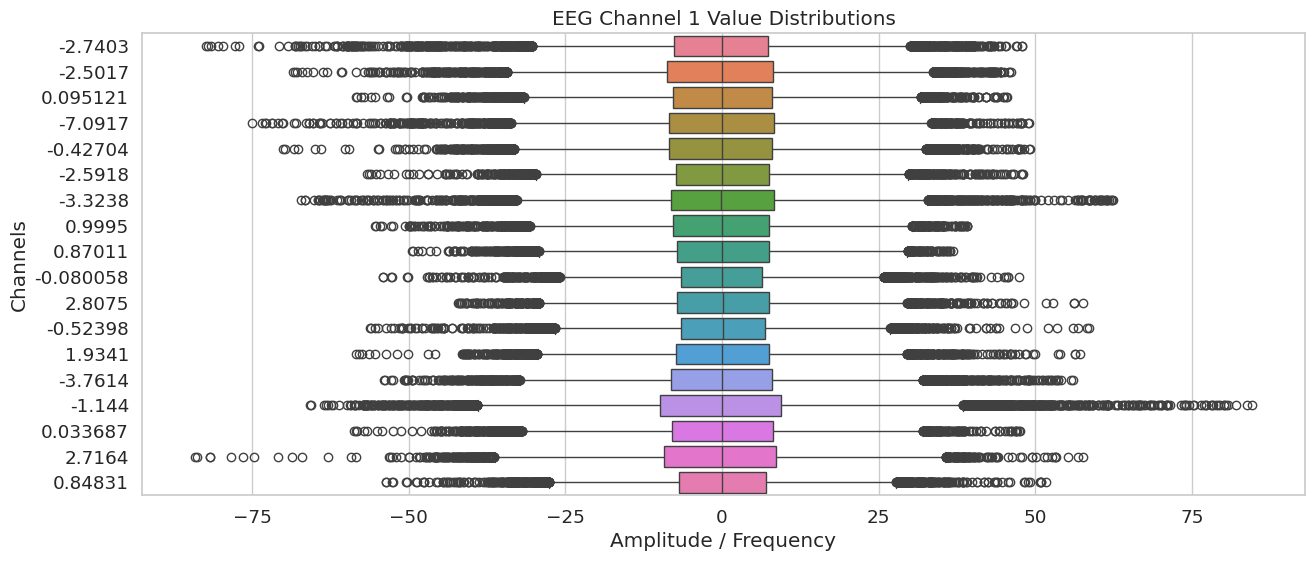

In [55]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, orient="h")
plt.title("EEG Channel 1 Value Distributions")
plt.xlabel("Amplitude / Frequency")
plt.ylabel("Channels")
plt.show()

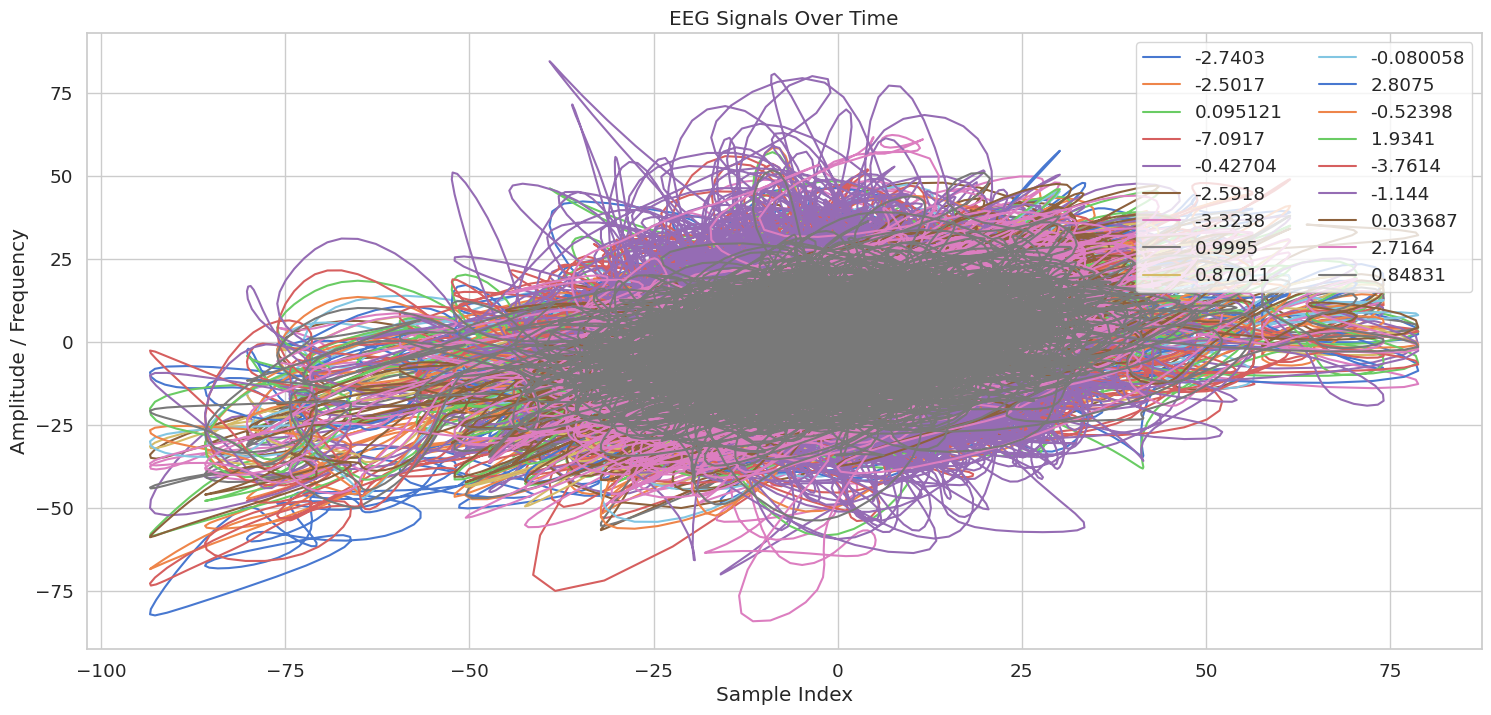

In [64]:
plt.figure(figsize=(18,8))
for col in df.columns:
    plt.plot(df.index[:], df[col][:], label=col)  
plt.title("EEG Signals Over Time")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude / Frequency")
plt.legend(loc="upper right", ncol=2)
plt.show()

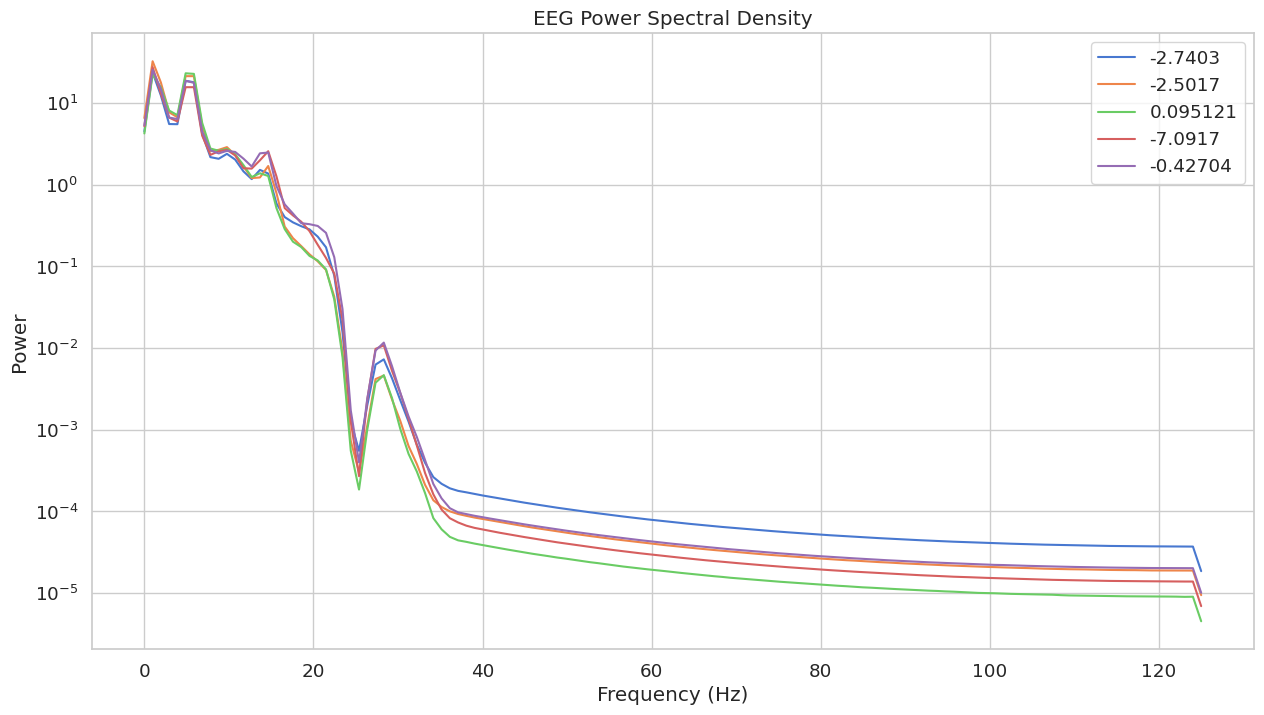

In [66]:
from scipy.signal import welch

plt.figure(figsize=(15,8))
for col in df.columns[:5]:  # Plot first 5 channels for clarity
    f, Pxx = welch(df[col], fs=250)  # fs = sampling frequency in Hz, adjust if known
    plt.semilogy(f, Pxx, label=col)
plt.title("EEG Power Spectral Density")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.legend()
plt.show()